# Response Matrix

In this tutorial, we obtain the response matrix of a whatsapp group. This matrix quantifies the number of responses of each user to another user. That is, how many times a user has answered the message of another user.

We assume that if there is a message sent after another message, the first is a response to the latter. This might lead to some errors but eventhough we can perceive the overall group response pattern.

In the resulting matrix, each row corresponds to the user giving the answer (we refer to this user as the "replier"). Likewise, each column stands for the user receiving an answer (we refer to this user as the "replied").

In [1]:
from __future__ import print_function
import sys
sys.path.append('../')

In [2]:
from whatstk.wparser import WhatsAppChat

As always, we start by creating the `WhatsAppChat` object with the chat file that we want to analyse.

In [28]:
wpchat = WhatsAppChat("../chats/samplechat.txt")

Next, we can use the method `response_matrix_probability` to obtain a DataFrame with the number of responses between all users. In particular, the coefficient $(i, j)$ ($i$:th row and $j$:th column) corresponds to the number of responses that the $i$:th user has done to the $j$:th user.

In [29]:
RM = wpchat.response_matrix_probability()

Now we will plot the resulted matrix using some of the visualization tools of `whatstk`

In [30]:
# Import matplotlib and wpvis module
import matplotlib
from whatstk import wpvis

In [31]:
# Set figure size
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

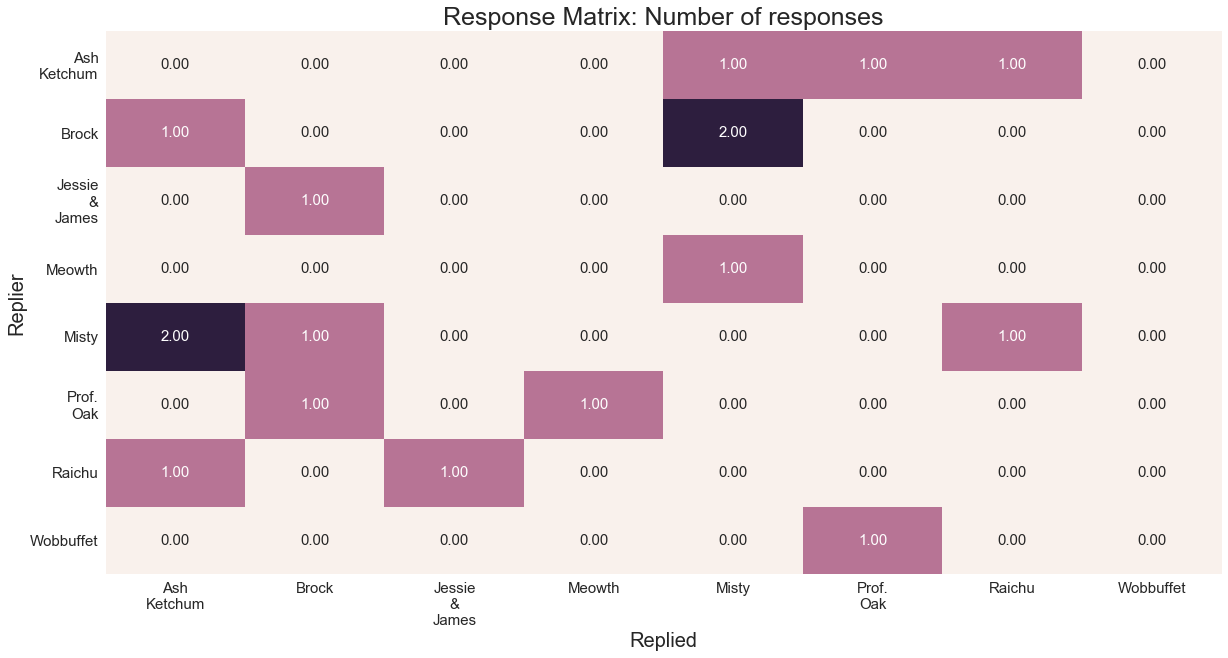

In [32]:
# Visualize the matrix as a heatmap
wpvis.vis_response_matrix(RM, title_size=25, xlabel_size=20, ylabel_size=20, tick_size=15, anot_size=15)

The method `response_matrix_probability` allows for an input argument. If we use `ptype='joint'` we can obtain the joint probability. That is, the probability of having a specific combination of message and reply.

In [33]:
RM_joint = wpchat.response_matrix_probability(ptype='joint')

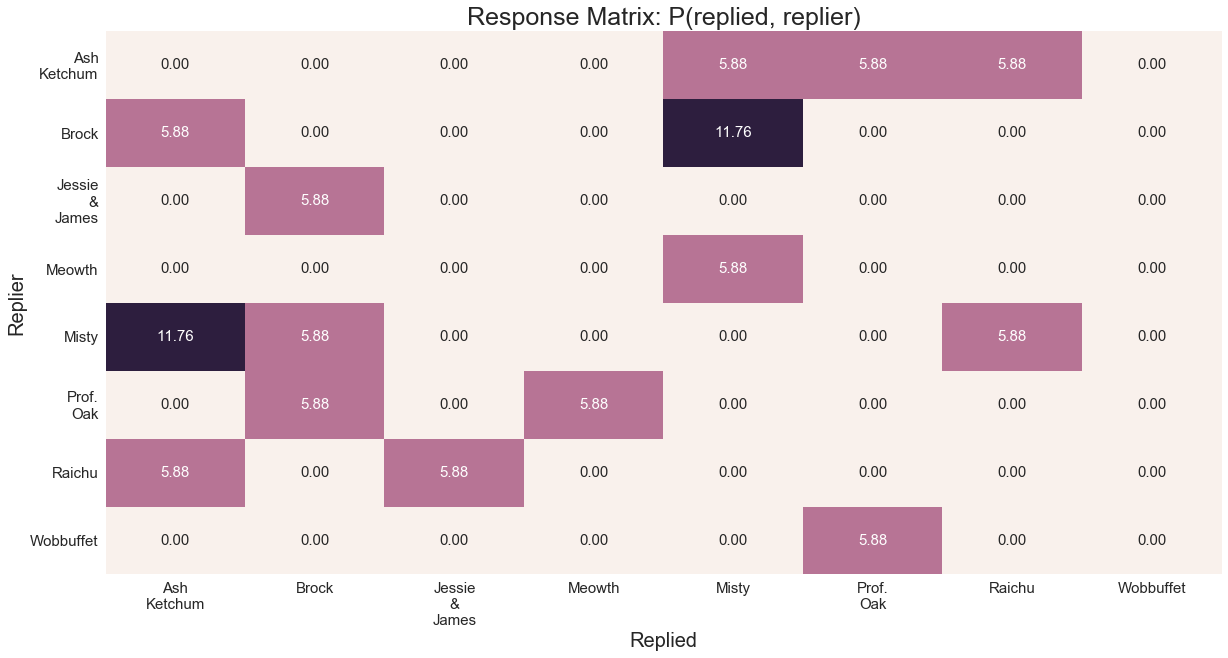

In [34]:
wpvis.vis_response_matrix(RM_joint, ptype = 'joint', title_size=25, xlabel_size=20, ylabel_size=20, tick_size=15, anot_size=15)

Using `ptype='conditional_replier'` we obtain the probability conditioned on the replier. Note that users with a lot of interventions will have more probability mass allocated.

In [35]:
RM_crr = wpchat.response_matrix_probability(ptype='conditional_replier')

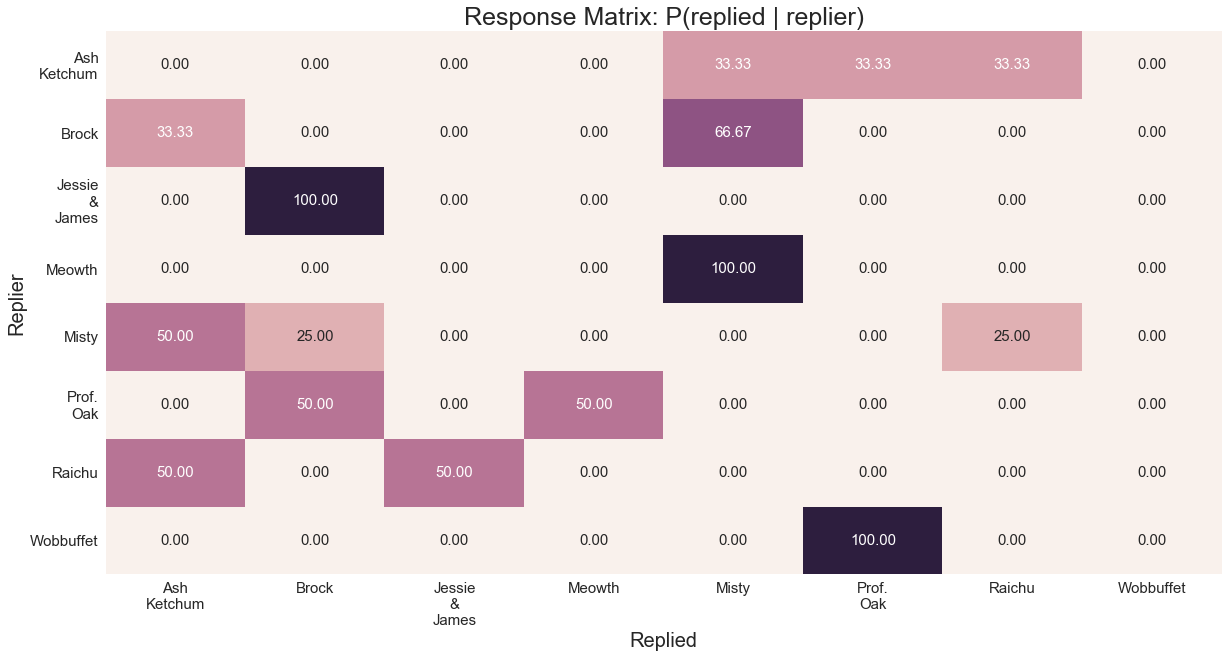

In [36]:
wpvis.vis_response_matrix(RM_crr, ptype = 'conditional_replier', title_size=25, xlabel_size=20, ylabel_size=20, tick_size=15, anot_size=15)

Finally, using `ptype='conditional_replied'` we obtain the probability conditioned on the replied. Note, again, that users with a lot of interventions will have more probability mass allocated.

In [37]:
RM_crd = wpchat.response_matrix_probability(ptype='conditional_replied')

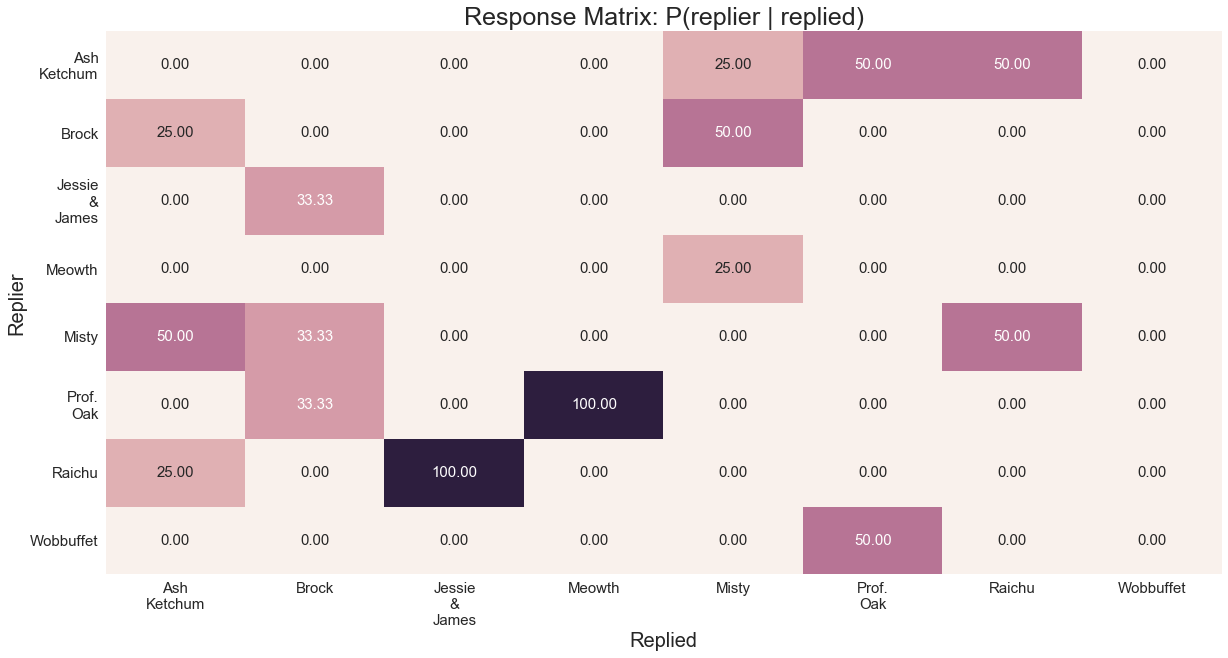

In [38]:
wpvis.vis_response_matrix(RM_crd, ptype = 'conditional_replied', title_size=25, xlabel_size=20, ylabel_size=20, tick_size=15, anot_size=15)